<a href="https://colab.research.google.com/github/riteshgupta614/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/4_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
---

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **In this project, we are required to do**
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **Importing Libraries**

In [51]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet




# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words

from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

# **Loading the Dataset**
There is a total of **7787** movies / TV shows in this data set collected from **AlmaBetter**

Each row contains the following information: **type** (Movie or TV Show), **title, director, cast, country, rating** (ex. PG, PG-13, R, etc.), **listed_in** (genre), and **plot description**.

In [52]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df_netflix = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


# **Exploratory Data Analysis (EDA)**

In [54]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [55]:
df_netflix.shape

(7787, 12)

In [56]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [57]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **NULL VALUES**

**NULL VALUE TREATMENT**

1. RATING & COUNTRY - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

2. CAST - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA

3. DATE - there are few missing values for date column. so, lets drop missing value rows.

4. DIRECTOR - Director column has more then 30% null values so dropping that column

In [58]:
df_netflix['rating'].replace(np.nan, 'TV-MA',inplace  = True)
df_netflix['country'].replace(np.nan, 'United States',inplace  = True)
df_netflix['cast'].replace(np.nan, 'missing info',inplace  = True)

df_netflix= df_netflix.drop(columns='director',axis=1)

In [59]:
df_netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [60]:
df_netflix= df_netflix.dropna()
#df_netflix = df_netflix[df_netflix['date_added'].notna()]



In [61]:
df_netflix.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [62]:
df_netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [63]:
# add new features
df_netflix["date_added"] = pd.to_datetime(df_netflix['date_added'])
df_netflix['year_added'] = df_netflix['date_added'].dt.year
df_netflix['month_added'] = df_netflix['date_added'].dt.month

# **Analyze the type of content available on Netflix**

---



Analysis entire Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.

**Netflix Content By Type**

In [64]:
# ploting for pie chart on type feature
# import plotly.express as px
x = df_netflix['type'].value_counts().reset_index()
colors=['darkblue','royalblue']
fig = px.pie(x,title='Type of Netflix Content',values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
#color_discrete_sequence=px.colors.sequential.RdBu
fig.update_traces(textposition='inside', textinfo='percent+label')
#, textfont_size=20,marker=dict(colors=colors, line=dict(color='#000000', width=2))


**Observations :-**

* It is evident that there are more movies on Netflix than TV shows.
* Netflix has 5377 movies, which is more than double the quantity of TV shows.
* There are about 70% movies and 30% TV shows on Netflix.

In [65]:
country = df_netflix['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]
fig = px.pie(country, values='country', names='index')
#color_discrete_sequence=px.colors.sequential.Plasma_r
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

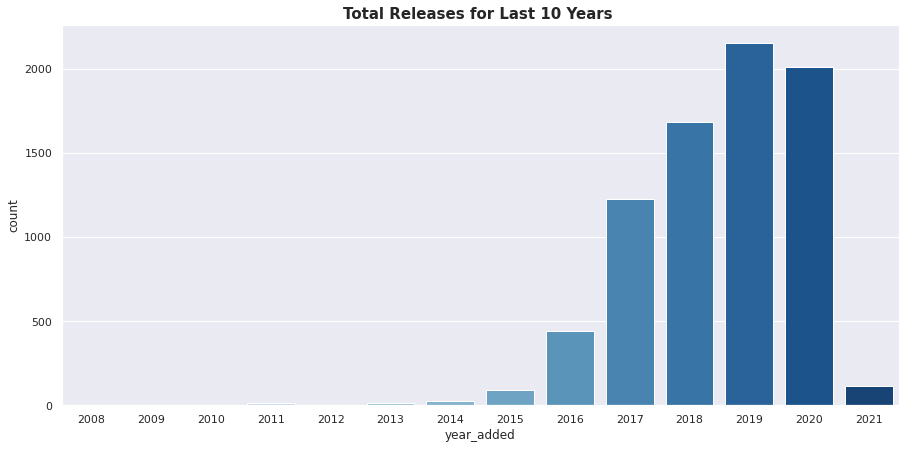

In [66]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=df_netflix,palette="Blues")
plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

**The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19**

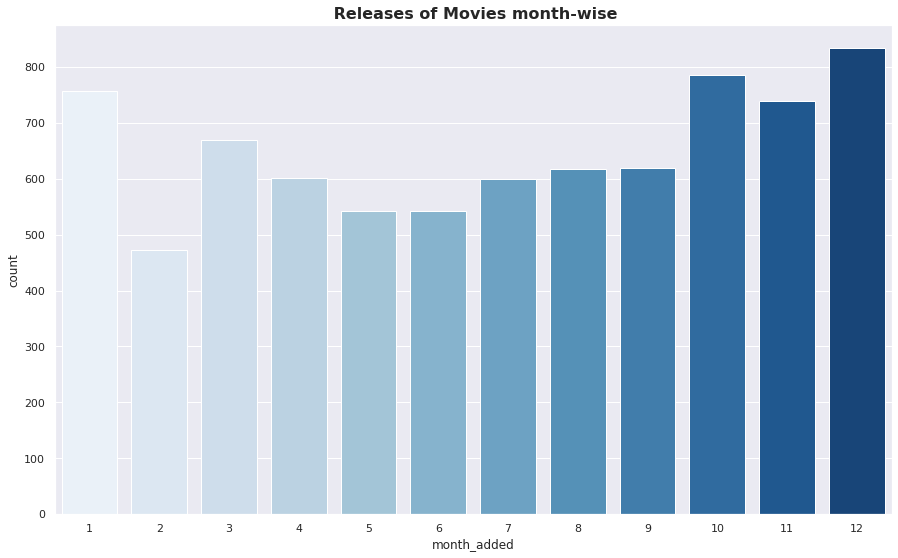

In [67]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=df_netflix,palette="Blues")

plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

**More of the content is released in holiday season - October, November, December and January**

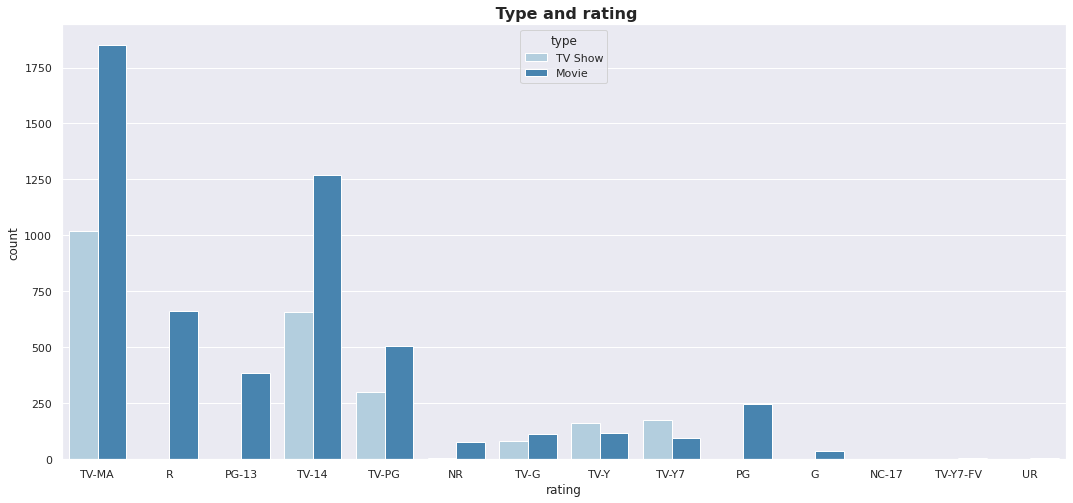

In [68]:
# Rating
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=df_netflix,palette="Blues")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

**Top Genres on Netflix**

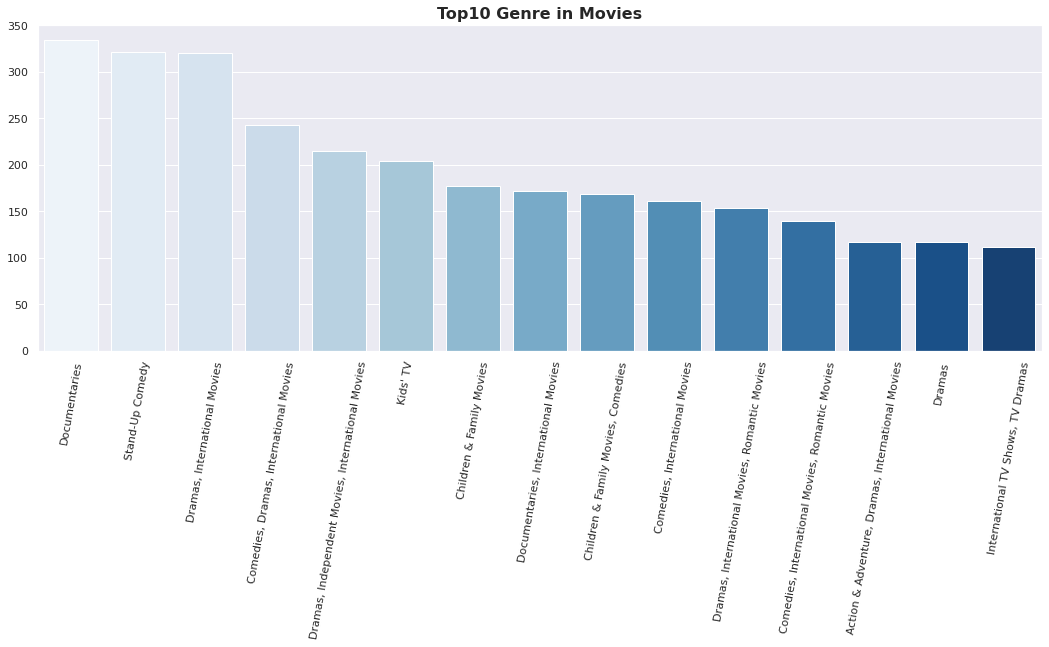

In [69]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = df_netflix["listed_in"].value_counts().head(15).index,
            y = df_netflix["listed_in"].value_counts().head(15).values,palette="Blues")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies..

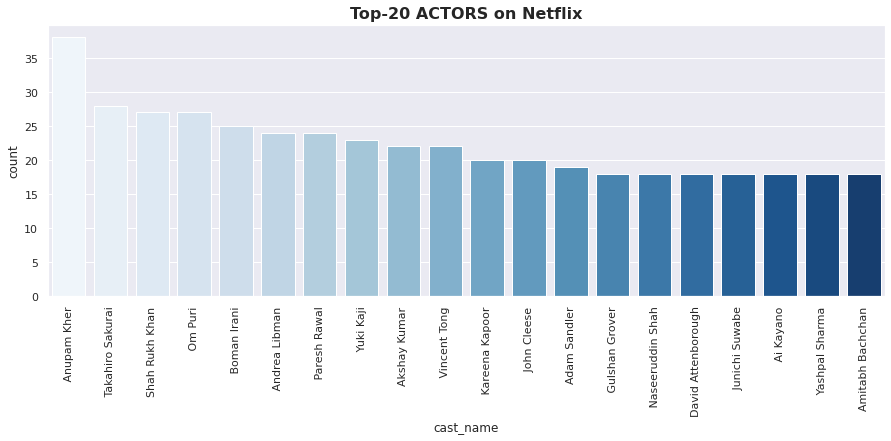

In [70]:
# Top 20 actors netflix
df_netflix['cast_name'] = df_netflix['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df_netflix['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Blues")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.

In [71]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   cast          7777 non-null   object        
 4   country       7777 non-null   object        
 5   date_added    7777 non-null   datetime64[ns]
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   object        
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
 11  year_added    7777 non-null   int64         
 12  month_added   7777 non-null   int64         
 13  cast_name     7777 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.1+ MB


In [72]:
df_netflix['duration']=df_netflix['duration'].str.replace('Season','')
df_netflix['duration']=df_netflix['duration'].str.replace('s','')
df_netflix['duration']=df_netflix['duration'].str.replace('min','')

df_netflix['duration']=df_netflix['duration'].astype(str).astype(int)
df_netflix['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

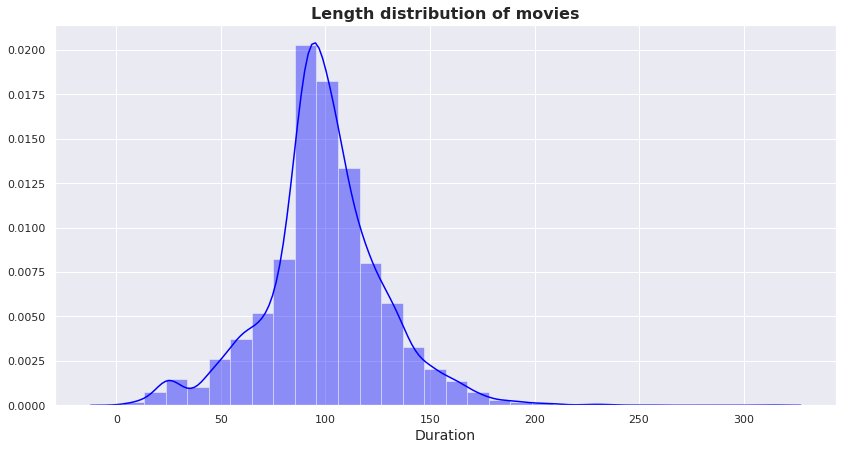

In [73]:
# Length distribution of movies
movie_df = df_netflix[df_netflix['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

In [74]:
# Season-wise distribution of tv shows
tv_df = df_netflix[df_netflix['type']=='TV Show']
tv_df['duration'].value_counts()

tv=tv_df['duration'].value_counts().T.reset_index()

fig = px.pie(tv,values='duration',names='index',color_discrete_sequence=px.colors.sequential.Greens)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color = 'RebeccaPurple', width=2)))

**LONGEST TV - SHOWS**

---



In [75]:
long_shows = tv_df[tv_df['duration']>9]
long_shows_df = long_shows[['title','duration']]
long_shows_df.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


# **DATA CLEANING AND PREPROCESSING**

In [76]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'cast_name'],
      dtype='object')

In [77]:
movie_df.drop(columns=['show_id', 'title', 'cast', 'date_added', 'description', 'cast_name'],axis=1,inplace=True)

tv_df.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description', 'cast_name'],axis=1,inplace=True)

new_df_netflix = df_netflix.drop(columns=['show_id', 'title', 'cast', 'date_added', 'description', 'cast_name'],axis=1)
# movie_df
new_df_netflix

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,TV Show,Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1
...,...,...,...,...,...,...,...,...
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",2020,10
7783,Movie,India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",2019,3
7784,Movie,United States,2019,TV-MA,44,"Documentaries, International Movies, Music & M...",2020,9
7785,TV Show,Australia,2019,TV-PG,1,"International TV Shows, Reality TV",2020,10


In [78]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df_netflix["type"] = le.fit_transform(new_df_netflix["type"])
new_df_netflix["country"] = le.fit_transform(new_df_netflix["country"])

new_df_netflix['rating'] = le.fit_transform(new_df_netflix['rating'])
new_df_netflix['listed_in'] = le.fit_transform(new_df_netflix['listed_in'])

**Text Cleaning**

---



In [79]:
#combining genre and description column 
text_df = df_netflix['listed_in'] + df_netflix['description']
text_df

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7777, dtype: object

In [80]:
#fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

Netflix Content for different age groups in top 10 countries


In [81]:
df_netflix['principal_country'] = df_netflix['country'].apply(lambda x: x.split(",")[0])
df_netflix['principal_country'].head()

country_order = df_netflix['principal_country'].value_counts()[:11].index
content_data = df_netflix[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [82]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df_netflix['age_rating'] = df_netflix['rating'].replace(rating_ages)
df_netflix['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

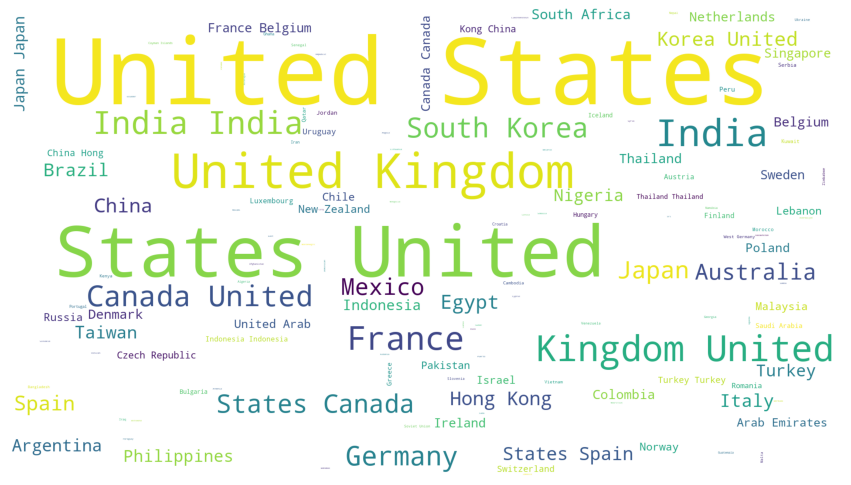

In [83]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_netflix.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

## **CorrelationHeatmap**

In [84]:
df_netflix['count'] = 1
data = df_netflix.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

df_netflix_heatmap = df_netflix.loc[df_netflix['principal_country'].isin(data)]
df_netflix_heatmap = pd.crosstab(df_netflix_heatmap['principal_country'], df_netflix_heatmap['age_rating'],normalize = "index").T
df_netflix_heatmap

principal_country,Australia,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.495327,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.463790
Kids,0.130841,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.088974
Older Kids,0.214953,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.201892
Teens,0.028037,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.084540
Young Adults,0.130841,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.160804


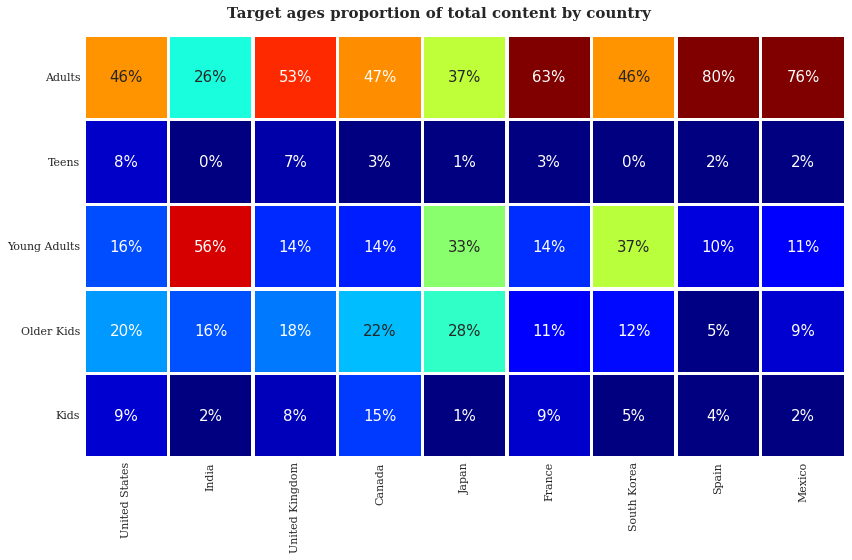

In [85]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(df_netflix_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

**Observations:**
1. It is also interesting to see parallels between culturally comparable nations - the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

2. Also, Mexico and Spain have similar content on Netflix for different age groups.

# **Clustering**

**Scaling the data**

In [86]:
# transform the data using StandardScaler
df_netflix_standarized = pd.DataFrame(StandardScaler().fit_transform(new_df_netflix),columns = new_df_netflix.columns)

#Perform a PCA to visualize clusters
pca = PCA(n_components = 3)
df_netflix_pca=pd.DataFrame(pca.fit_transform(df_netflix_standarized))

In [87]:
df_netflix_standarized.head()

,type,country,release_year,rating,duration,listed_in,year_added,month_added
0,1.496802,-2.041651,0.692231,0.492155,-1.280313,1.084506,1.085420,0.338631
1,-0.668091,-0.505346,0.235617,0.492155,0.467228,0.381066,-1.796311,1.452410
2,-0.668091,-0.099853,-0.335151,-1.052434,0.172698,0.588901,-0.355446,1.452410
3,-0.668091,0.871046,-0.563458,-1.567297,0.211969,-1.713266,-1.075878,1.173965
4,-0.668091,0.871046,-0.677611,-1.567297,1.056286,0.253168,1.085420,-1.610483


# **Clusters Model Implementation**
1. ***Affinity Propagation***
2. ***Agglomerative Clustering***
3. ***K-means Clustering***

# **1. Affinity Propagation**

> Indented block



In [88]:
af = AffinityPropagation(preference = -753, damping = 0.60, verbose = True, random_state = 0).fit(df_netflix_standarized) #Using euclidean distance as affinity estimator
#af = AffinityPropagation(damping=0.97,affinity='euclidean',verbose=True).fit(netflix) #Using euclidean distance
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(df_netflix_standarized, labels, metric = 'sqeuclidean'))

Converged after 81 iterations.
Estimated number of clusters: 13
Silhouette Coefficient: 0.244


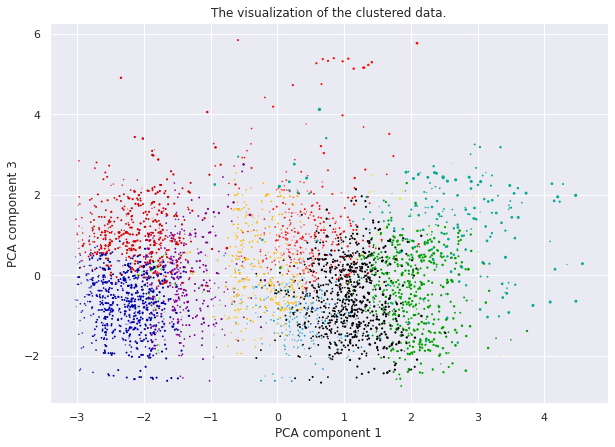

In [89]:
colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)
#ax = plt.gca()
fig_dims = (10,7)
fig, ax = plt.subplots(figsize = fig_dims) 
plt.scatter(df_netflix_pca[0], df_netflix_pca[1],df_netflix_pca[2], c = colors)
ax.set_title('The visualization of the clustered data.')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')
ax.set_ylabel('PCA component 3');


In [90]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_netflix_standarized, labels, metric='sqeuclidean'))

Silhouette Coefficient: 0.244


Silhouette Coefficient score is **0.244** which is not that well. so we will
try some diffrent clustering models.

# **2. Agglomerative Clustering**

> Indented block



In [91]:
# lets start with programimg
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 10)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters =', n_clusters,
              'The average silhouette_score is :', silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 15
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title('The silhouette plot for the various clusters.')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Clusters')

        ax1.axvline(x=silhouette_avg, color = 'cyan', linestyle= '--')

        ax1.set_yticks([])  
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title('The visualization of the clustered data.')
        ax2.set_xlabel('PCA component 1')
        ax2.set_ylabel('PCA component 2')

        plt.suptitle(('\nSilhouette analysis for Agglomerative clustering '
                      'with n_clusters = %d' % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

### **Assume we cut vertical lines with a horizontal line to obtain the number of clusters.**
**Number of clusters = 4**

For n_clusters = 4 The average silhouette_score is : 0.17296314851287742


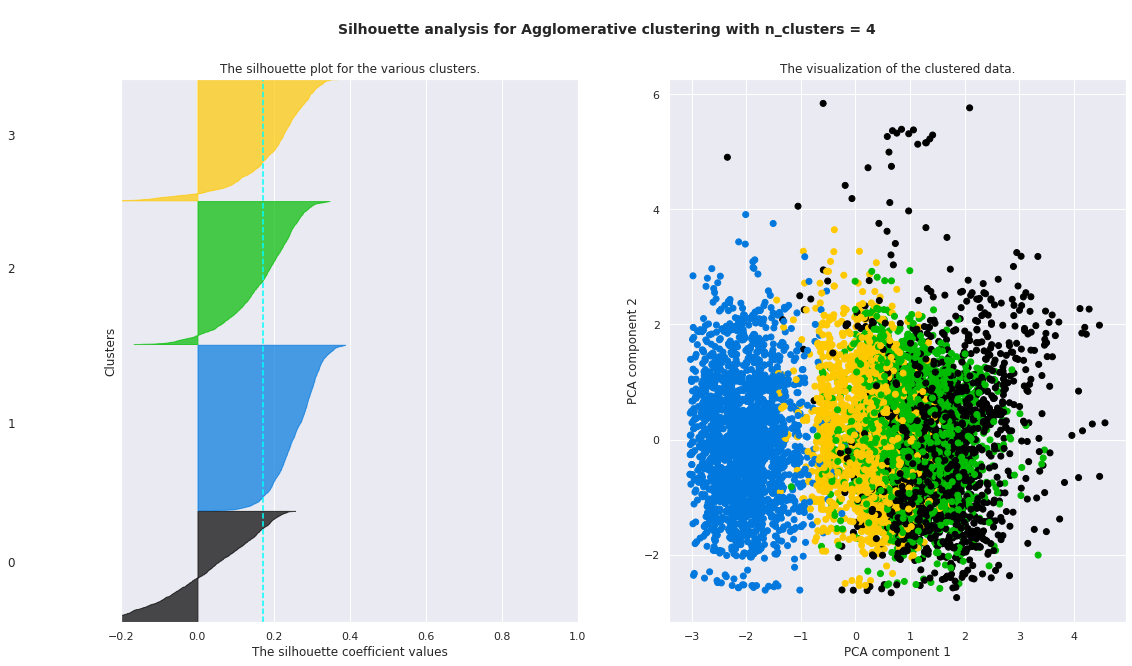

In [92]:
silhouette_analysis(np.array(df_netflix_standarized),df_netflix_pca,[4])

# **3. K-MEANS clustering**

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


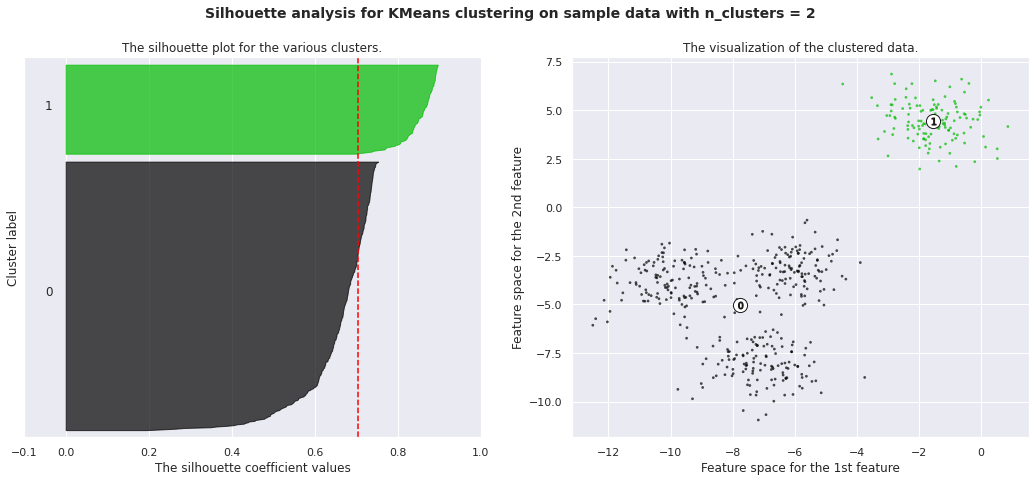

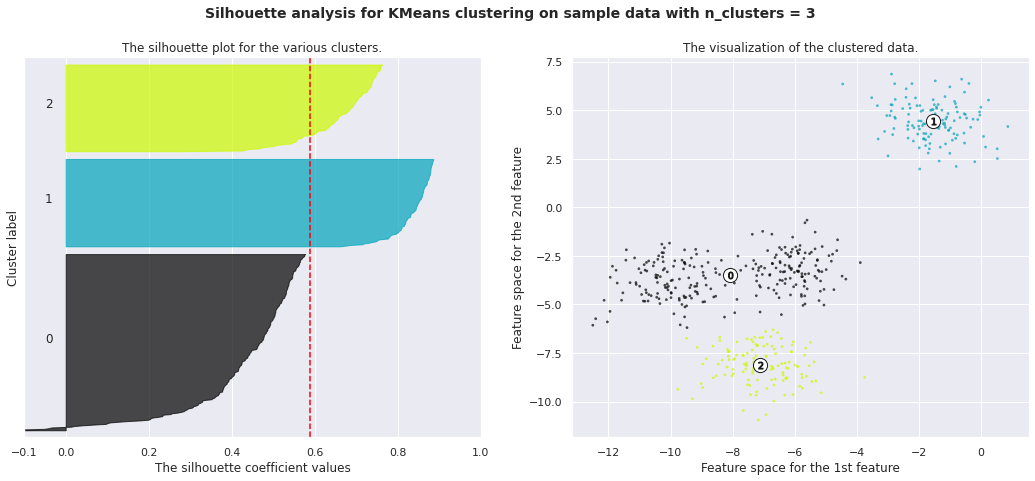

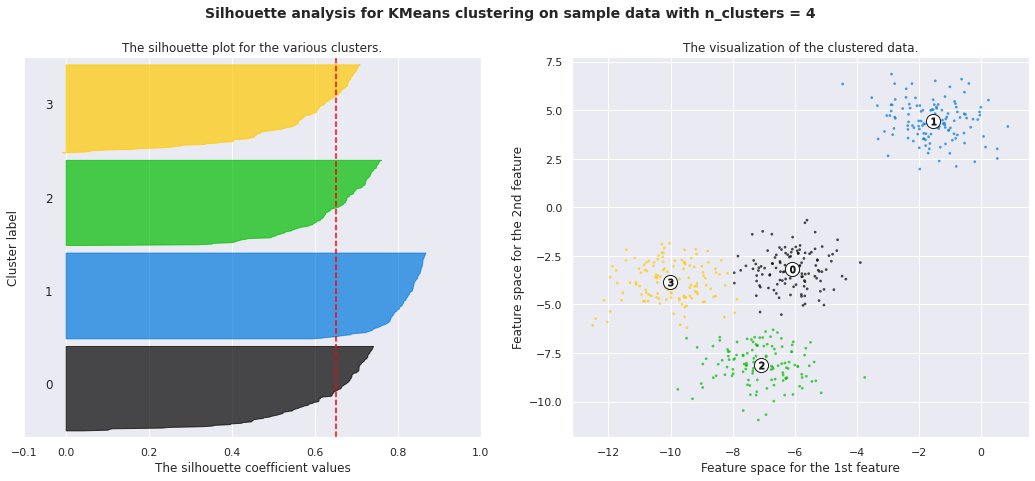

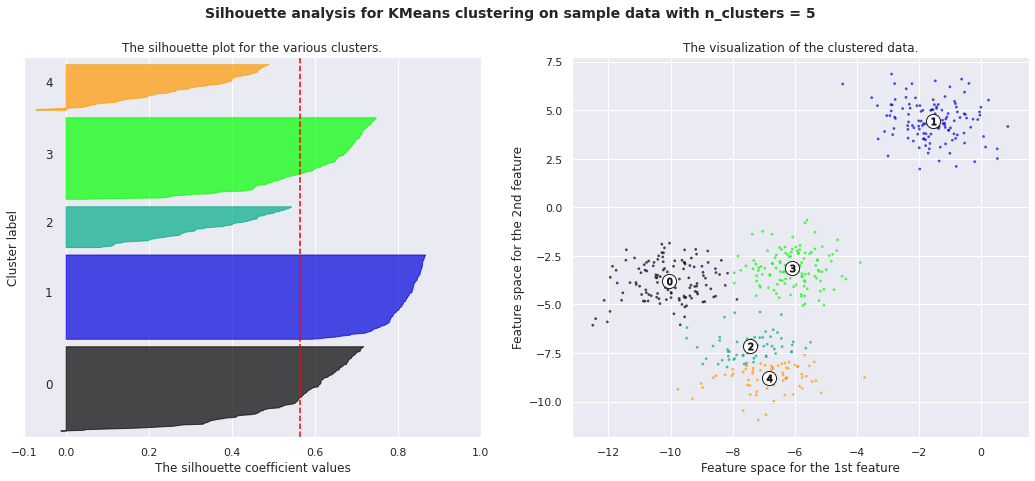

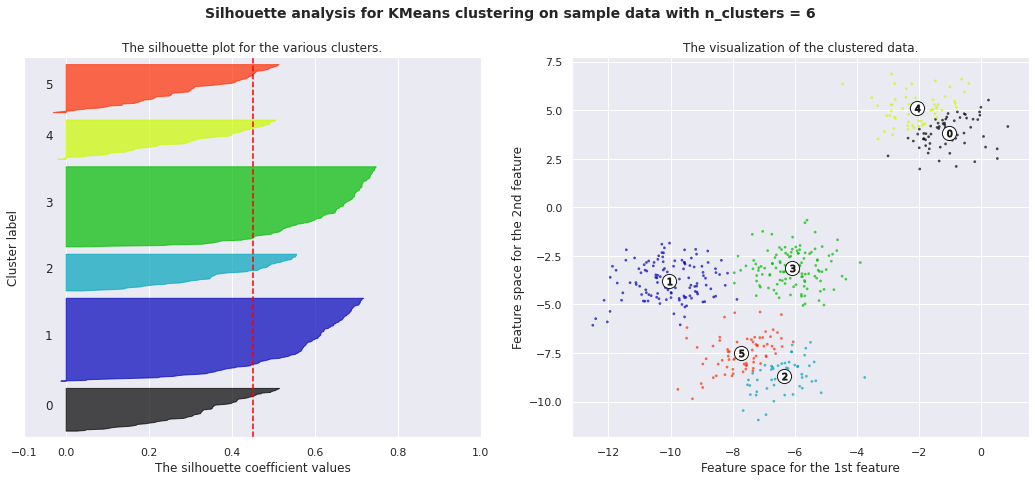

In [93]:
# Generating the sample data from make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)              #  For reproducibility

range_n_clusters = [2, 3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

The value of 4 and 5 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores.

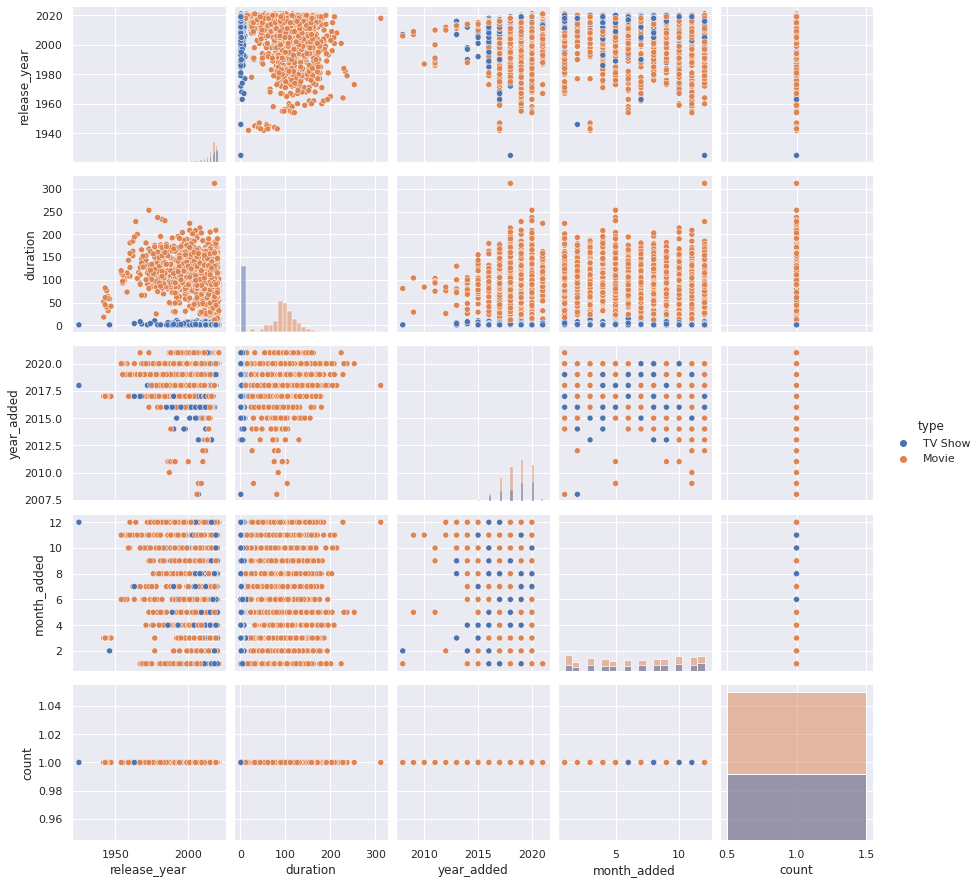

In [94]:
# MODEL INTERPRETATION
# We try to gain new knowledge using the previous clustering
sns_plot=sns.pairplot(df_netflix, hue="type", diag_kind="hist") #All features against each other
kmeans = KMeans(n_clusters = 4,random_state=42)
kmeans.fit(df_netflix_standarized)
df_netflix['cluster'] = kmeans.labels_

In [95]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = scaler.fit_transform(new_df_netflix)
Netflix = pd.DataFrame(sc, columns=list(new_df_netflix.columns))
X = Netflix
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(Netflix).score(Netflix) for i in range(len(kmeans))]

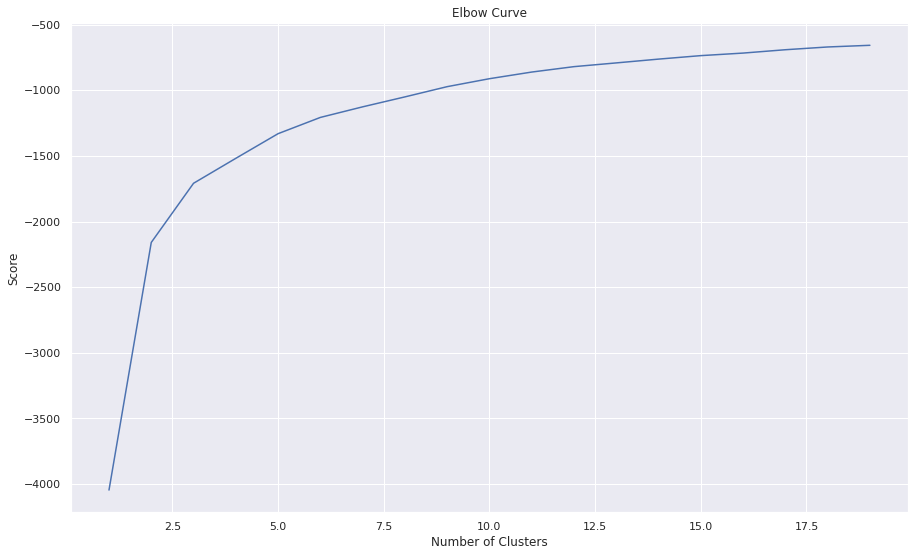

In [96]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [97]:
#fitting
kmeans = KMeans(n_clusters=5)
kmeans.fit(Netflix)

KMeans(n_clusters=5)

In [98]:
len(kmeans.labels_)
df_netflix['cluster'] = kmeans.labels_
df_netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name,principal_country,age_rating,count,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,Adults,1,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,Adults,1,3
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,Adults,1,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,Teens,1,0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,Teens,1,2


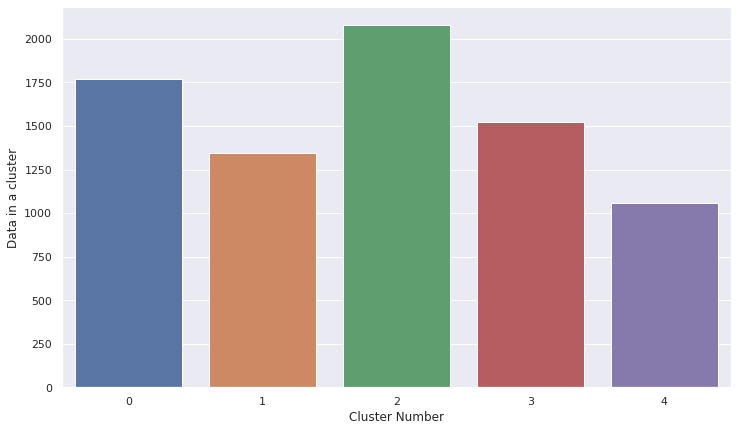

In [99]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_netflix.groupby(['cluster']).count()['type'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Data in a cluster")

We clearly see that one cluster is the largest and one cluster has the fewest number of movies.

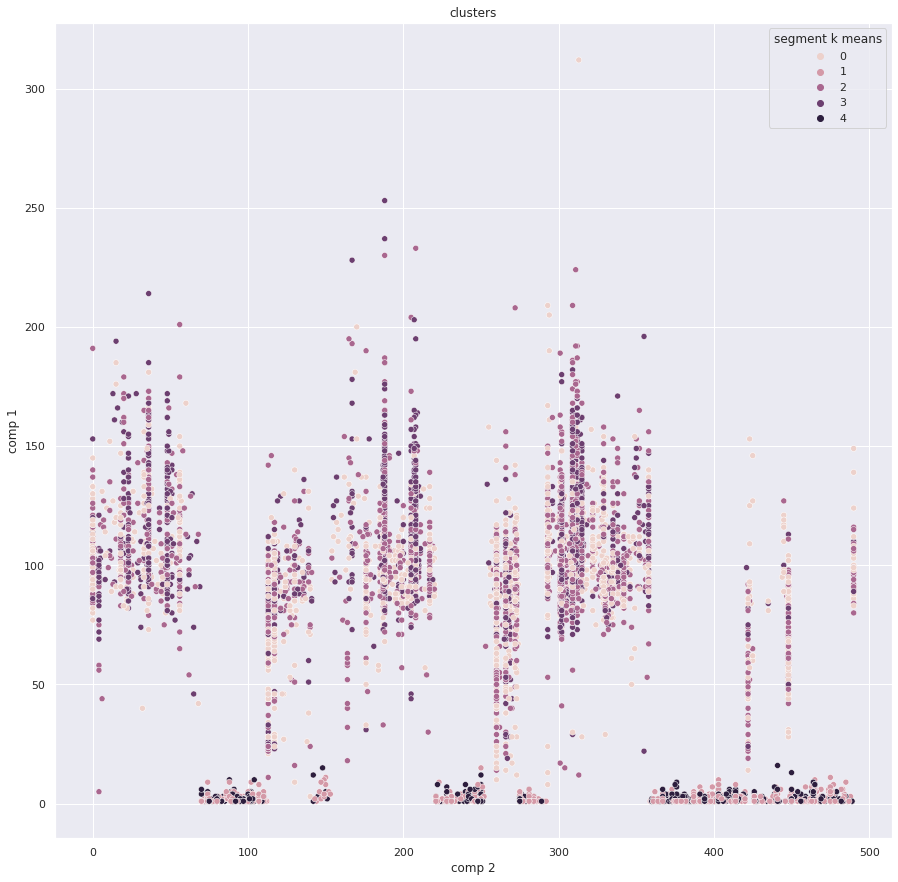

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             7777 non-null   int64  
 1   country          7777 non-null   int64  
 2   release_year     7777 non-null   int64  
 3   rating           7777 non-null   int64  
 4   comp 1           7777 non-null   int64  
 5   comp 2           7777 non-null   int64  
 6   comp 3           7777 non-null   int64  
 7   comp 4           7777 non-null   int64  
 8   comp 5           19 non-null     float64
 9   segment k means  7777 non-null   int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 638.0 KB


In [100]:
df = pd.concat([new_df_netflix,pd.DataFrame(score)],axis=1)
df.columns.values[-5:]=['comp 1','comp 2','comp 3','comp 4','comp 5']
df['segment k means'] = kmeans.labels_
x_axis = df['comp 2']
y_axis = df['comp 1']
plt.figure(figsize=(15,15))
sns.scatterplot(x_axis,y_axis,hue=df['segment k means'])
plt.title('clusters')
plt.show()

df.info()

# **Conclusion :**

1)There are about 70% movies and 30% TV shows on Netflix.

2)Data set contains 7787 rows and 12 columns in that cast and director features contains large number of missing values so we can drop it and we have 10 features for the further implementation

3)The United States has the highest number of content on Netflix by a huge margin followed by India.

4)Raul Campos and Jan Sulter collectively have directed the most content on Netflix.

5)Anupam Kher has acted in the highest number of films on Netflix. Drama is the most popular genre followed by comedy.

6)More of the content is released in holiday season - October, November, December and January.

7)The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.

8)By applying the silhouette score method for n range clusters on dataset we got best score which is 0.348 for 3 clusters it means content explained well on their own clusters, by using elbow method after k = 3 curve gets linear it means k = 3 will be the best cluster

9)Applied different clustering models Kmeans, hierarchical, Agglomerative clustering on data we got the best cluster arrangments

10)By applying different clustering algorithms to our dataset .we get the optimal number of cluster is equal to 3